# SYSTEM

In [1]:
from yolo import *
from tracking import *
from vehicle import *
from loading import *

yolo = Yolo(score = 0.3, iou = 0.45)


Using TensorFlow backend.


In [7]:
KalmanBoxTracker.count = 0
import warnings
warnings.filterwarnings('ignore')

# useable speed : 2179, 2285, 2288
# useable crossRedLine: 7728,8732
# stream for speed: https://www.twitch.tv/zimissstv
# stream for cross red line:
mode = 'speed'
num_vid = '2179'



base_link = 'C:/Users/ADMINS/Desktop/SaiGon/'
video_link = base_link + mode + '/' + num_vid + '/' + 'video.MOV'
data_link = base_link + mode + '/' + num_vid + '/' + 'data.txt'


# stream crossRedLine

# video_link = 'https://www.twitch.tv/itunes_k79'
# data_link = 'C:/Users/ADMINS/Desktop/Stream_protect/data.txt'

all_lanes,best_performance_range, mask_point, vp1,vp2,pp,scale = loadData(data_link)
allow_lanes = []
# deadline = [-0.041, +1, +518.585]

# vd_7728 = 'C:/Users/ADMINS/Desktop/SaiGon/cross_red_line/7728/IMG_7728.MOV'

output_path = "C:/Users/ADMINS/Desktop/temp_8.avi"


mask_7728 = 'C:/Users/ADMINS/Desktop/SaiGon/crossRedLine/7728/mask.png'
deadline_7728 = [183, -2710000, 24481]

deadline_8732 = [-85, -28, 24048]
mask_8732 = 'C:/Users/ADMINS/Desktop/SaiGon/crossRedLine/8732/mask.png'
# all_lanes = [np.array([1,0,0]),
#              np.array([1,0,-1280])]

mask_stream = 'C:/Users/ADMINS/Desktop/Stream_protect/mask.png'
deadline_stream = [248,-97,-102239]

a = detect_video(yolo = yolo, 
                 video_type = 'local', 
                 video_path = video_link, 
                 output_path = output_path,
                 mask_path= mask_stream, 
                 mode= mode, 
                 scale = scale,
                 vp1 = vp1, 
                 vp2 = vp2, 
                 pp = pp, 
                 allow_speed = 30, 
                 best_performance_range = best_performance_range, 
                 deadline4Red = deadline_stream,
                 allow_lanes = allow_lanes, 
                 all_lanes = all_lanes,
                 mask_point = mask_point,
                 show = True)


Exception in thread Thread-6:
Traceback (most recent call last):
  File "C:\Users\ADMINS\Anaconda3\envs\yolo\lib\threading.py", line 916, in _bootstrap_inner
    self.run()
  File "C:\Users\ADMINS\Anaconda3\envs\yolo\lib\threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\ADMINS\Desktop\final_project\cross line\stream.py", line 86, in update_buffer
    frame = numpy.fromstring(raw_image, dtype='uint8').reshape((self.byte_width, self.byte_lenght, 3))
ValueError: cannot reshape array of size 0 into shape (720,1280,3)



In [5]:
import numpy as np
import json

def loadData(json_link):
    with open(json_link, 'r') as data:
        file = json.load(data)
        all_lanes = file["LanesMeasurement"]
        for k,v in enumerate(all_lanes):
            all_lanes[k] = np.array(all_lanes[k])
        best_performance_range = file["BestPerformanceRange"]
        vp1,vp2,pp,scale = file["CameraCamlibration"]
        mask_point = file["Mask"]
    return all_lanes, best_performance_range, mask_point, vp1,vp2,pp,scale

def dumpData(json_link, data):
    with open(json_link, 'w')as outfile:
        dict = {"LanesMeasurement": data[0],
                "BestPerformanceRange": data[1],
                "Mask":data[2],
                "CameraCamlibration": data[3]}
        json.dump(dict, outfile)
    

In [46]:
import numpy as np
a = np.ones((76,5))
count = 0
with open('C:/Users/ADMINS/Desktop/data.txt', 'r') as f:
    for k,line in enumerate(f):
        count+=1
#         temp = line.replace(' ','&' )
        temp = line.split(' ')
        a[k,:] = temp
print(a.shape)
m1 = (a[:,3])
m2 = a[:,4]
a = (m1-m2)**2
b = (np.sum(a))/76
print(np.sqrt(b))
print(np.sqrt(np.sum((m1-m2)**2)))
#         print(temp)
# a[:,2] = np.round(a[:,2],2)
# a[:,3] = np.round(a[:,3],2)

# for i in a:
#     string = str(int(i[0])) + ' & ' + str(int(i[1])) + ' & ' + str(i[2]) + ' & ' + str(i[3]) + ' & ' + str(i[4]) + '\\' +'\\'
#     print(string)
#     print('\hline')
    

(76, 5)
2.6444944294956505
23.054167949855575


In [38]:
data = 'C:/Users/ADMINS/Desktop/SaiGon/foreign/video.avi'

vp1 = [1.136941176470588e+03,2.094117647058824e+02]
vp2 = [-1.842891566265060e+03,1.749397590361446e+02]
pp = [640,360]
scale = 0.009158282892303235
data = []


data.append([[1,0,0],
             [1,0,-1280]])
data.append([445,650])
data.append([[0,0],[0,10],[10,10],[10,0]])
data.append([vp1,vp2,pp,scale])


# vp1 = [1.136941176470588e+03,2.094117647058824e+02]
# vp2 = [-1.842891566265060e+03,1.749397590361446e+02]
# vp3 = [5.507611538170746e+02,8.073993735307192e+03]
# focal = 1.098172646207694e+03
# road plane -89.2388461829254	7713.99373530719	1098.17264620769	10

dump_link = 'C:/Users/ADMINS/Desktop/SaiGon/foreign.json'
dumpData(dump_link, data)

In [43]:
# 2285

all_lanes = [np.array([-1.13,  -1, 1322.83]),
             np.array([-3.29,  -1, 3200.26]),
             np.array([18.2,-1, 16206]),
             np.array([1.95, -1, -1454.3]),
             np.array([0.875, -1, -513.25])]
best_performance_range = [495,801]
vp1 = [9.685714285714286e+02,2.742857142857143e+02]
vp2 = [-119520,1020]
pp  = [960,540]
scale = 0.015183010864846656

# mask_point = [[1159,499],[1464,821],[545,499],[194,821]]

In [110]:
# 2179
a = [43,44,37,46,43,52,46,40,58,62,54,39,52,51,29,53,64,53,53,50,44,58,48,49,47,51,58]
# a.sort()
# for i in a:
#     print("Number {} appear: {}".format(i,a.count(i)))
#2285
b = [31,30,28,30,24,32,33,31,29,30,35,29,36,23,39,30,29,32,32,28,32,26]
# b.sort()
# print(b)
# 2287
c = [42,38,29,45,42,47,35,15,43,36,44,34,61,33,49,34,33,35,34,41,44,34,33,43,36,31,36,36,31,44,39,40,42]
# c.sort()
# print(c)
# temp = set(a)
# temp = list(temp)
# print(temp)
# temp.sort()
# print(temp)
# a = [29,]
# temp = []
d = a+b+c
temp = (list(set(d)))
    

In [92]:
list_a = [0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0,2,2,0,2,1,1,1,1,2,2,3,1,3,0,1,1]
print(len(list_a))

35


In [93]:
list_b = [0,1,1,1,2,3,4,2,4,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
print(len(list_b))

35


In [94]:
list_c = [1,0,0,0,0,1,0,2,0,3,4,2,4,0,1,1,1,1,3,2,3,1,0,1,0,1,0,0,0,0,0,0,1,0,0]
print(len(list_c))

35


In [106]:
temp = list(range(15,65))

No handles with labels found to put in legend.


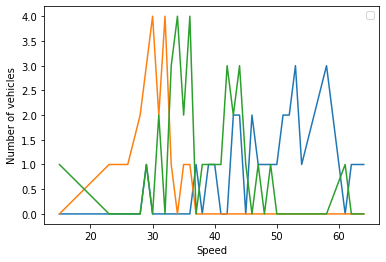

In [111]:
import matplotlib.pyplot as plt
x = temp
y = [list_a,list_b,list_c]
plt.xlabel("Speed")
plt.ylabel("Number of vehicles")
# plt.title("")
# for i in range(len(y[0])):
#     plt.plot(x,[pt[i] for pt in y],label = 'id %s'%i)
plt.plot(x,y[0])
plt.plot(x,y[1])
plt.plot(x,y[2])
plt.legend()
plt.savefig('speed.png')
plt.show()


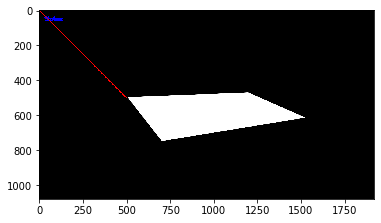

In [11]:

import cv2
import matplotlib.pyplot as plt
a = cv2.imread('mask.jpg')
cv2.putText(a, "Status: ", (30, 60),cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 5)
cv2.line(a, (0,0), (500,500), (255,0,0), 5) 

plt.imshow(a)

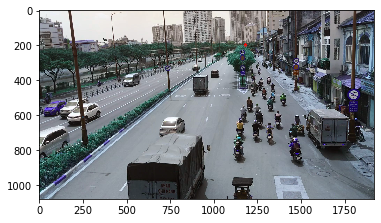

In [5]:
import cv2
from matplotlib import pyplot as plt
image = 'C:/Users/ADMINS/Desktop/Saigon/screen_2179.jpg'
img = cv2.imread(image)
img = cv2.circle(img, (1183,200), 6, (255,0,0), 5)
plt.imshow(img)

In [4]:
import cv2
vd_2179 = 'C:/Users/ADMINS/Desktop/SaiGon/speed/2179/video.MOV'
vd_2285 = 'C:/Users/ADMINS/Desktop/SaiGon/speed/2285/IMG_2285.MOV'
vd_2288 = 'C:/Users/ADMINS/Desktop/SaiGon/speed/2288/video.MOV'
vd_2287 = 'C:/Users/ADMINS/Desktop/SaiGon/speed/2287/IMG_2287.MOV'
vd_7728 = 'C:/Users/ADMINS/Desktop/SaiGon/cross_red_line/7728/video.MOV'
vd_2181 = 'C:/Users/ADMINS/Desktop/SaiGon/speed/2181/video.MOV'
vd_2185 = 'C:/Users/ADMINS/Desktop/SaiGon/speed/2185/video.MOV'
# vd_2288 = 'C:/Users/ADMINS/Desktop/SaiGon/speed/2288/IMG_2288.MOV'
vd_2286 = 'C:/Users/ADMINS/Desktop/SaiGon/speed/2286/IMG_2286.MOV'

vd_8732 = 'C:/Users/ADMINS/Desktop/SaiGon/crossRedLine/8732/video.MOV'

tracking_result = 'C:/Users/ADMINS/Desktop/result/tracking_2287.MOV'
cross = 'C:/Users/ADMINS/Desktop/cross_red.avi'

video_result = 'C:/Users/ADMINS/Desktop/temp_1.avi'

foreign_data = 'C:/Users/ADMINS/Desktop/SaiGon/foreign/video.avi'

cross_red_result = 'C:/Users/ADMINS/Desktop/result/Protect_date/7728_result.avi'
# import os
# print(os.path.exists(vd_2288))

cap = cv2.VideoCapture(vd_8732)
frame_num = 0
# print(cap.isOpened())
while(cap.isOpened()):   
    
    ret, frame = cap.read()
    
    if frame_num < (30):
        frame_num+=1
        continue
#     frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    cv2.imwrite('C:/Users/ADMINS/Desktop/8732.png',frame)
    break
cap.release()
cv2.destroyAllWindows()
    
    
    
    
    

In [42]:
a = cv2.imread('C:/Users/ADMINS/Desktop/some.jpg')
b = np.copy(a)
cv2.imshow('frame',a)
cv2.waitKey()
cv2.destroyAllWindows()

In [41]:
a = np.array([1,2,3,4,5,6,7,8])
b = np.array(a)
b[0] = 10
print(a,b)

[1 2 3 4 5 6 7 8] [10  2  3  4  5  6  7  8]


In [5]:
import cv2

image_path = 'C:/Users/ADMINS/Desktop/SaiGon/cross_red_line/7728/mask.png'
image = cv2.imread(image_path,0)
edges = cv2.Canny(image,100,200)
cv2.imwrite('C:/Users/ADMINS/Desktop/7728_mask_canny.png',edges)
# cv2.namedWindow('image',cv2.WINDOW_NORMAL)
# cv2.resizeWindow('image', 600,600)
# cv2.imshow('image',edges)
# cv2.waitKey(0)
# cv2.destroyAllWindows()


True

In [6]:
import cv2

mask_path = 'C:/Users/ADMINS/Desktop/7728_mask_canny.png'
mask = cv2.imread(mask_path,0)
temp = []
for k,v in enumerate(mask):
    for i,j in enumerate(v):
        if j == 255:
            temp.append([k,i])

In [10]:
import cv2

image_path = 'C:/Users/ADMINS/Desktop/SaiGon/cross_red_line/7728/7728_screen.png'
image = cv2.imread(image_path,0)
image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
for i in temp:
    image[i[0],i[1],0] = 0
    image[i[0],i[1],1] = 0
    image[i[0],i[1],2] = 255
cv2.imwrite('C:/Users/ADMINS/Desktop/7728_mask_real.png',image)


True

In [15]:
from vehicle_speed import *
# vp1 = [1.183030303030303e+03, 2.006060606060606e+02]
# vp2 = [-9.329230769230768e+03,9.338461538461538e+02]
vp1 = [1088,186]
vp2 = [-1021,238]
vp1 = [9.686486486486486e+02,2.545945945945946e+02]
vp2 = [-479040,-9060]
pp = [960, 540]
# 2288
vp1 = [9.514285714285714e+02,2.742857142857143e+02]
vp2 = [162240,1180]

# 2285
vp1 = [9.685714285714286e+02,2.742857142857143e+02]
vp2 = [-119520,1020]

#foreign

vp1 = [1.136941176470588e+03,2.094117647058824e+02]
vp2 = [-1.842891566265060e+03,1.749397590361446e+02]
pp = [640,360]
vp1, vp2, vp3, pp, roadPlane, focal = computeCameraCalibration(vp1,vp2,pp)
# print(pp)
# p1 = np.array([1136,450,1])
# p2 = np.array([818,440,1])

# 2287
# p1 = np.array([483,749,1])
# p2 = np.array([1223,738,1])
# p1 = np.array([749,483,1])
# p2 = np.array([738,1223,1])

#2288
p1 = np.array([1464,821,1])
p2 = np.array([194,821,1])

#2285
p1 = np.array([509,803,1])
p2 = np.array([1385,803,1])

#foreign
p1 = np.array([979,385,1])
p2 = np.array([817,378,1])

real = 3
p1 = getWorldCoordinagesOnRoadPlane(p1, focal, roadPlane, pp)
p2 = getWorldCoordinagesOnRoadPlane(p2, focal, roadPlane, pp)
print(type(p1))
print(p2)
fake = np.linalg.norm(p1-p2)
scale = real/fake
print(scale)
    
    

<class 'numpy.ndarray'>
[  267.38583726   322.1070343  -2311.83435655]
0.009158282892303235


In [63]:
vp1 = [144.737, 34.7794]
vp2 = [12183.582175112755, 615.451021479187]
pp = [960.5, 540.5]
vp1, vp2, vp3, pp, roadPlane, focal = tuple_cam
points = map(lambda p: np.array([p[-2],p[-1],1]), ([5,6],[7,8]))
print(list(points))
# points = map(projector, points)

# print(list(points))

[array([5, 6, 1]), array([7, 8, 1])]


In [21]:
import cv2
video_path = 'Z:\\Vehicle speed measuring\\video_speed measure\\front.avi'
import numpy as np
import cv2

cap = cv2.VideoCapture(video_path)
size = (int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)),
        int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))

# Define the codec and create VideoWriter object
# fourcc = cv2.CV_FOURCC('m', 'p', '4', 'v') # upper case - yl3
fourcc = cv2.VideoWriter_fourcc('M','J','P','G')
out = cv2.VideoWriter("C:/Users/ADMINS/Desktop/tracking.avi", fourcc , 25, size, 1) #20.0: number of frames per sec

while(cap.isOpened()):
    ret, frame = cap.read()
    if ret==True:
#         frame = cv2.flip(frame,1)

        # write the flipped frame
        out.write(frame)

        cv2.imshow('frame',frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break

# Release everything if job is finished
cap.release()
out.release()
cv2.destroyAllWindows()

In [1]:
import cv2
import numpy as np
import itertools
from matplotlib import pyplot as plt

# Find convolution of 2 shape

In [1]:
def getMask(mask_path):
    # path to mask image
    mask = cv2.imread(mask_path,0)
    mask_position=set()
    for row, value in enumerate(mask):
        for column, element in enumerate(value):
            if element == 255:
                mask_position.add((column,row))
    return mask_position

def getBbox(bbox):
    x,y,x_plus_w,y_plus_h = bbox 
    vehicle_position = itertools.product(range(x,x_plus_w+1),range(y,y_plus_h+1))
    return set(vehicle_position)

def getProbability2Shape(vehicle, mask):
    match = len(vehicle)-len(vehicle.difference(mask))
    bbox  = len(vehicle)
    return (match*100)/bbox

'''
Just a mark for myself
'''
def get_output_layers(net):
    '''
    get all output layer names: with yolov3 is yolo_82, 94 and 106
    ''' 
    layer_names = net.getLayerNames()
    
    output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]

    return output_layers


def draw_prediction(img, class_id, confidences, x, y, x_plus_w, y_plus_h):
    '''
    draw a bounding box around object
    '''
    label = str(classes[class_id])

    color = COLORS[class_id]
    
#     print(x,y,x_plus_w,y_plus_h)
    cv2.rectangle(img, (x,y), (x_plus_w,y_plus_h), color, 2)

    cv2.putText(img, label, (x-10,y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

def bounding_pic(net, image, scale, size,mask):
    '''
    net: the model reading by open-cv (maybe YoLo or SSD)
    image: image need to bouding box
    scale: image pixel multiply with this
    size: a tuple contain size of image
    '''
    Width = image.shape[1]
    Height = image.shape[0]
    # Resize picture to 416x416, because YOLO take in 416x416
    blob = cv2.dnn.blobFromImage(image, scale, (416,416), (0,0,0), True, crop=False)
    # set input is resized picture
    net.setInput(blob)
    # last layer of Yolo model
    outs = net.forward(get_output_layers(net))

    class_ids = []
    confidences = []
    boxes = []
    conf_threshold = 0.6
    # maybe our model will detect many bouding box for an object, this threshold help us take the box with equal 
    #            or higher propability
    nms_threshold = 0.4

    '''
    out is a 2D tensor like (number_of_objects, score_of_each_classes), with first five element in each row is special, 
    take e.g: out[0] = temp:
        + temp[0]: x_center of that object
        + temp[1]: y_center of that object
        + temp[2]: width of that object
        + temp[3]: height of that object
        + temp[4]: unknow value
        + from 5 to above is the score of that object to each classes => COCO have 80 class so each row contain 85 element,
            will be 15 with CIFAR,and 1005 with IMAGENET  
    '''
    for out in outs:
        for detection in out:
            scores = detection[5:]
            # get the highest score to determine its label
            class_id = np.argmax(scores)
            if class_id not in [0,1,2,3,7]:
                continue
            else:
                # score of that object, make sure more than 50% correct label
                confidence = scores[class_id]
                if confidence > 0.5:
                    # scale again with w and h
                    center_x = int(detection[0] * Width)
                    center_y = int(detection[1] * Height)
                    w = int(detection[2] * Width)
                    h = int(detection[3] * Height)
                    # remember it return x_center and y_center, not x,y, so we need to find x,y
                    x = center_x - w / 2
                    y = center_y - h / 2
                    class_ids.append(class_id)
                    confidences.append(float(confidence))
                    boxes.append([x, y, w, h])

    # detect bouding box around objects
    indices = cv2.dnn.NMSBoxes(boxes, confidences, conf_threshold, nms_threshold)
    # set the counting line
    lineThickness = 2
    
    for i in indices:
        i = i[0]
        box = boxes[i]
        x = round(box[0])
        y = round(box[1])
        w = round(box[2])
        h = round(box[3])
        draw_prediction(image, class_ids[i], confidences[i], round(x), round(y), round(x+w), round(y+h))
        bbox = getBbox((x,y,x+w,y+h))
        print(len(bbox), len(mask))
        conv = getProbability2Shape(bbox,mask)
        text1 = 'Convolution: ' + str(round(conv,2)) + '%'
        text2 = 'True' if conv > 80 else 'False'
        cv2.putText(image, text1, (x, y),
                        cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 5)
        cv2.putText(image, 'Fault: '+text2, (x, y+30),
                        cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 5)
    return image

# Find the position of vehicle

In [26]:
import numpy as np
def distanceFromPoint2Line(p, line):
    a,b,c = line[0],line[1],line[2]
    try:
        # if list or np.array shape 1
        x,y = p[0],p[1]
    except:
        # if np.array shape 2
        x,y = p[0][0], p[0][1]
    finally:
        top = abs(a*x+b*y+c)
        bottom = np.linalg.norm(np.array([a,b]))
        return top/bottom

def cosineVetorPhase(v1,v2):
    dotProduct = np.dot(v1,v2)
    normV1 = np.linalg.norm(v1)
    normV2 = np.linalg.norm(v2)
    return dotProduct/(normV1*normV2)

def checkSameSideNormalVector(p, line):
    # p is numpy array with shape [1,3] with the final element is 1
    # line is something like ax+by+c = 0, line =[a,b,c]
    return (line[0]*p[0]+line[1]*p[1]+c) > 0


In [2]:
import cv2
import numpy as np
import time

def get_output_layers(net):
    '''
    get all output layer names: with yolov3 is yolo_82, 94 and 106
    ''' 
    layer_names = net.getLayerNames()
    
    output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]

    return output_layers


def draw_prediction(img, class_id, confidences, x, y, x_plus_w, y_plus_h):
    '''
    draw a bounding box around object
    '''
    truck_color = [60,160,0]
    car_color = [169,105,126]
    motorbike_color = [48,149,239]
    
    label = str(classes[class_id])

    if class_id==2:
        color = car_color
    elif class_id==3:
        color = motorbike_color
    elif class_id==7:
        color = truck_color
    else:
        color = [255,255,255]

    cv2.rectangle(img, (x,y), (x_plus_w,y_plus_h), color, 4)

    cv2.putText(img, label, (x-10,y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)
    
    cv2.putText(img, str(round(confidences,2)), (x-10,y-30), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

def bounding_pic(net, image, scale, size):
    '''
    net: the model reading by open-cv (maybe YoLo or SSD)
    image: image need to bouding box
    scale: image pixel multiply with this
    size: a tuple contain size of image
    '''
    Width = image.shape[1]
    Height = image.shape[0]
    # Resize picture to 416x416, because YOLO take in 416x416
    blob = cv2.dnn.blobFromImage(image, scale, (416,416), (0,0,0), True, crop=False)
    # set input is resized picture
    net.setInput(blob)
    # last layer of Yolo model
    outs = net.forward(get_output_layers(net))

    class_ids = []
    confidences = []
    boxes = []
    conf_threshold = 0.4
    # maybe our model will detect many bouding box for an object, this threshold help us take the box with equal 
    #            or higher propability
    nms_threshold = 0.4
    
    
    '''
    out is a 2D tensor like (number_of_objects, score_of_each_classes), with first five element in each row is special, 
    take e.g: out[0] = temp:
        + temp[0]: x_center of that object
        + temp[1]: y_center of that object
        + temp[2]: width of that object
        + temp[3]: height of that object
        + temp[4]: unknow value
        + from 5 to above is the score of that object to each classes => COCO have 80 class so each row contain 85 element,
            will be 15 with CIFAR,and 1005 with IMAGENET  
    '''
    for out in outs:
        for detection in out:
            scores = detection[5:]
            # get the highest score to determine its label
            class_id = np.argmax(scores)
            if class_id not in [1,2,3,7]:
                continue
            else:
                # score of that object, make sure more than 50% correct label
                confidence = scores[class_id]
                if confidence > 0.2:
                    # scale again with w and h
                    center_x = int(detection[0] * Width)
                    center_y = int(detection[1] * Height)
                    w = int(detection[2] * Width)
                    h = int(detection[3] * Height)
                    # remember it return x_center and y_center, not x,y, so we need to find x,y
                    x = center_x - w / 2
                    y = center_y - h / 2
                    class_ids.append(class_id)
                    confidences.append(float(confidence))
                    boxes.append([x, y, w, h])

    # detect bouding box around objects
    indices = cv2.dnn.NMSBoxes(boxes, confidences, conf_threshold, nms_threshold)
    # set the counting line
    lineThickness = 2
    
    for i in indices:
        i = i[0]
        box = boxes[i]
        x = box[0]
        y = box[1]
        w = box[2]
        h = box[3]
        draw_prediction(image, class_ids[i], confidences[i], round(x), round(y), round(x+w), round(y+h))
    return image


In [11]:
import cv2
config = './YOLOv3-416/yolov3.cfg'
name = './YOLOv3-416/coco.names'
weight = './YOLOv3-416/yolov3.weights'

# image = cv2.imread(image_path)

classes = None

with open(name, 'r') as f:
    # generate all classes of COCO, bicycle ind = 1, car ind = 2 and motorbike ind = 3
    classes = [line.strip() for line in f.readlines()]

COLORS = np.random.uniform(0, 255, size=(len(classes), 3))

# Read the model
net = cv2.dnn.readNet(weight, config)
net.setPreferableBackend(cv2.dnn.DNN_BACKEND_OPENCV)
net.setPreferableTarget(cv2.dnn.DNN_TARGET_CPU)
# take shape of image in order to scale it to 416x416, first layer of Yolo CNN

scale = 0.00392

image = cv2.imread('C:/Users/ADMINS/Desktop/temp_screen.png')

img = bounding_pic(net, image, scale, (416,416))
cv2.imwrite('C:/Users/ADMINS/Desktop/testcar_result_1.png',img)

True

In [3]:
import cv2 

vd_2179 = 'C:/Users/ADMINS/Desktop/SaiGon/speed/2179/video.MOV'
vd_2287 = 'C:/Users/ADMINS/Desktop/SaiGon/speed/2287/IMG_2287.MOV'
vd_2288 = 'C:/Users/ADMINS/Desktop/SaiGon/speed/2288/video.MOV'

vid = cv2.VideoCapture(vd_2287)

fps = vid.get(5)
video_FourCC = cv2.VideoWriter_fourcc('M','J','P','G')
video_size   = (int(vid.get(cv2.CAP_PROP_FRAME_WIDTH)),
                int(vid.get(cv2.CAP_PROP_FRAME_HEIGHT)))
out = cv2.VideoWriter('C:/Users/ADMINS/Desktop/detecting_2288.avi', video_FourCC, fps, video_size, 1)

frame_num = 0
thresh = 15

while True:
    return_value, pic = vid.read()
    if not return_value:
        break
    if frame_num%thresh == 0:
        pic =  bounding_pic(net, pic, scale, (416,416))
        cv2.imshow('frame', pic)
    #     out.write(pic)
        if cv2.waitKey(25) & 0xFF == ord('q'):
            cv2.imwrite('C:/Users/ADMINS/Desktop/testcar_result_1.png',pic)
            break
    frame_num+=1
vid.release()
# out.release()
cv2.destroyAllWindows()

NameError: name 'net' is not defined

In [40]:
import cv2

# path = 'C:\\Users\\ADMINS\\Desktop\\Latex\\test.png'
path = 'Z:\\Vehicle speed measuring\\BrnoCompSpeed\\code\\dataset\\session0_center\\screen.png'
image = cv2.imread(path)
# print(image.shape)







start_point = (800, 304) 
  
# End coordinate, here (250, 250) 
# represents the bottom right corner of image 
end_point = (748, 871) 
  
# Green color in BGR 
color = (0, 255, 0) 
  
# Line thickness of 9 px 
thickness = 9
  
# Using cv2.line() method 
# Draw a diagonal green line with thickness of 9 px 
image = cv2.line(image, (300,377), (500,854), color, thickness) 
image = cv2.line(image, (300,221), (500,473), color, thickness) 

image = cv2.line(image, (300,164), (500,337), color, thickness) 
image = cv2.line(image, (300,124), (500,237), color, thickness) 

# image = cv2.line(image, (0,0), (120,11), color, thickness) 
# image = cv2.line(image, (0,0), (120,11), color, thickness) 

# image = cv2.line(image, (0,0), (120,11), color, thickness) 
# image = cv2.line(image, (0,0), (120,11), color, thickness) 

# Displaying the image  
cv2.imshow('frame', image)  

cv2.waitKey(0)
cv2.destroyAllWindows()

In [61]:
def foo(x,ar):
    return (ar[0]*x+ar[2])/(-ar[1])
def getLaneForPoint(p, lines):
    for i in range(len(lines)-1):
        if isPointBetweenLines(p, lines[i], lines[i+1]):
            return i
    return None
all_lanes = [np.array([ -0.92226493,   0.38655841, 130.89136422]),
             np.array([-0.78325241,  0.62170384, 97.52101372]),
             np.array([-0.65281474,  0.7575176 , 71.40300615]), 
             np.array([  0.57,  -1.  , -47.39])]
all_lanes = [np.array([1,0,0]),
             np.array([1,0,-1920])]
getLaneForPoint((1000, 421),all_lanes)

0

ValueError: Expected 3-dimensional array, got 1

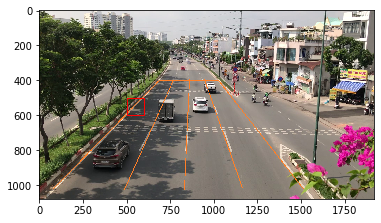

In [36]:
import cv2
import numpy as np

def isPointBetweenLines(p, l1, l2):
    p = np.append(np.array(p),[1])
    return np.dot(p,l1)*np.dot(p,l2)*np.dot(l1[0:2],l2[0:2]) <= 0

def getLaneForPoint(p, lines):
    for i in range(len(lines)-1):
        if isPointBetweenLines(p, lines[i], lines[i+1]):
            return i
    return None

all_lanes_2179 = [np.array([-0.783, -1, 1054.795]), \
                  np.array([-1.425, -1, 1772.768]), \
                  np.array([-3.397, -1, 3978.147]), \
                  np.array([-17.741, -1, 21223.407])]

# print(len(all_lanes_2179))
p2 = [830,708]
p1 = [403,868]
p3 = [1064,484]

img = cv2.imread('C:\\Users\\ADMINS\\Desktop\\2188_screen.png')

# v1 = getLaneForPoint(p1,all_lanes_2179)
# v2 = getLaneForPoint(p2,all_lanes_2179)
# v3 = getLaneForPoint(p3,all_lanes_2179)

# # p1 = []
# # p2 = []
# # p3 = []
# # p4 = []

# p1 = (430,821)
# p2 = (731,583)
# p3 = (924,544)
# p4 = (976,443)
# font = cv2.FONT_HERSHEY_SIMPLEX 
  
# fontScale = 1
 

# thickness = 4

# color = (237, 176, 0)
# cv2.putText(img, 'Lane 0', p1, font, fontScale, color, thickness, cv2.LINE_AA) 

# color = (0,0,255)
# cv2.putText(img, 'Lane 1', p2, font, fontScale, color, thickness, cv2.LINE_AA)

# color = (255,0,255)
# cv2.putText(img, 'Lane 2', p3, font, fontScale, color, thickness, cv2.LINE_AA)

# color = (0,255,0)
# cv2.putText(img, 'Lane 3 move to lane 2', p4, font, fontScale, color, thickness, cv2.LINE_AA)

# cv2.imwrite('C:\\Users\\ADMINS\\Desktop\\2188_lane_detection.png', img)

import matplotlib.pyplot as plt
import matplotlib.patches as patches

# cv2.rectangle(img, (100, 100), (200, 200), (255, 178, 502), 3)
# cv2.putText(img, 'abc', (150,150), cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 255, 255), 3)


from PIL import Image
import numpy as np

im = np.array(Image.open('C:\\Users\\ADMINS\\Desktop\\2188_screen.png'), dtype=np.uint8)

fig,ax = plt.subplots(1)

# Display the image
ax.imshow(im)


rect = patches.Rectangle((500,500),100,100,linewidth=1,edgecolor='r',facecolor='none', label = 'abc')

# cv2.imwrite('C:\\Users\\ADMINS\\Desktop\\not_important.png', img)
# Create a Rectangle patch
# rect = patches.Rectangle((50,100),40,30,linewidth=1,edgecolor='r',facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)
# print(ax.shape)
# plt.show()
plt.imsave("C:\\Users\\ADMINS\\Desktop\\not_important.png", rect)

In [26]:
a = np.array([-0.783, -1, 1054.795])
b = np.array([-1.425, -1, 1772.768])
np.dot(a[0:2],b[0:2])*np.dot(p1,a)*np.dot(p1,b)
# np.dot(p1,all_lanes_2179[3])

-14621.360217699234

In [99]:
def foo(a,b,**kwags):
    if a==1:
        c=kwags.pop('c',2)
        return b*c
    if a==2:
        d=kwags.pop('d',3)
        return b*d
foo(1,2,c = 3)

6

# Catch stream video

In [1]:
import streamlink
import numpy
from threading import Thread
import subprocess as sp
from queue import Queue

class VideoStreamer:
    def __init__(self, twitch_url, queueSize=128, resolution='720p', n_frame=10):
        self.stopped = False
        self.twitch_url = twitch_url
        self.res = resolution
        self.n_frame = n_frame

        # initialize the queue used to store frames read from
        # the video stream
        self.Q = Queue(maxsize=queueSize)
        checkIfStreamsWorks = self.create_pipe()

        if checkIfStreamsWorks:
            self.start_buffer()

    def create_pipe(self):
        streamer_name = self.twitch_url.split("/")[3]


        try:
            streams = streamlink.streams(self.twitch_url)
        except streamlink.exceptions.NoPluginError:
            print("NO STREAM AVAILABLE for " + streamer_name)
            return False
        except:
            print("NO STREAM AVAILABLE no exception " + streamer_name)
            return False

        #print("available streams: "+ str(streams))

        resolutions = {'360p': {"byte_lenght": 640, "byte_width": 360}, '480p': {"byte_lenght": 854, "byte_width": 480}, '720p': {"byte_lenght": 1280, "byte_width": 720}, '1080p': {"byte_lenght": 1920, "byte_width": 1080}}

        if self.res in streams:
            finalRes = self.res
        else:
            for key in resolutions:
                if key != self.res and key in streams:
                    print("USED FALL BACK " + key)
                    finalRes = key
                    break
            else: # das else gehört zur foor loop! wenn sie nicht breaked dann wird der teil ausgeführt https://docs.python.org/2/tutorial/controlflow.html#break-and-continue-statements-and-else-clauses-on-loops
                print("COULD NOT FIND STREAM " + streamer_name)
                return False

        self.byte_lenght = resolutions[finalRes]["byte_lenght"]
        self.byte_width = resolutions[finalRes]["byte_width"]

        print("FINAL RES " + finalRes + " " + streamer_name)

        stream = streams[finalRes]
        self.stream_url = stream.url

        self.pipe = sp.Popen(['C:/Users/ADMINS/Desktop/stream/ffmpeg-20191106-fc7b6d5-win64-static/bin/ffmpeg', "-i", self.stream_url,
                         "-loglevel", "quiet",  # no text output
                         "-an",  # disable audio
                         "-f", "image2pipe",
                         "-pix_fmt", "bgr24",
                         "-vcodec", "rawvideo", "-"],
                        stdin=sp.PIPE, stdout=sp.PIPE)
        return True

    def start_buffer(self):
        # start a thread to read frames from the file video stream
        t = Thread(target=self.update_buffer, args=())
        t.daemon = True
        t.start()
        return self

    def update_buffer(self):

        count_frame = 0

        while True:

            if count_frame % self.n_frame == 0:

                raw_image = self.pipe.stdout.read(
                    self.byte_lenght * self.byte_width * 3)  # read length*width*3 bytes (= 1 frame)

                frame = numpy.fromstring(raw_image, dtype='uint8').reshape((self.byte_width, self.byte_lenght, 3))

                if not self.Q.full():
                    self.Q.put(frame)
                    count_frame += 1
                else:
                    count_frame += 1
                    continue
            else:
                count_frame += 1
                continue

    def read(self):
        # return next frame in the queue
        return self.Q.get()

    def more(self):
        # return True if there are still frames in the queue
        return self.Q.qsize() > 0

    def stop(self):
        # indicate that the thread should be stopped
        self.stopped = True

In [8]:
v= VideoStreamer('https://www.twitch.tv/itunes_k79')

FINAL RES 720p itunes_k79


C:\Users\ADMINS\Anaconda3\envs\yolo\lib\site-packages\ipykernel_launcher.py:86: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


In [9]:
import time
import cv2
# start_time = time.time()
# x = 1 # displays the frame rate every 1 second
# counter = 0

count = 0
start_time = time.time()
while True:
    if v.more():

        frame = v.read()
#         count+=1
#         if int(count)>=50:
#             fps = count/(time.time()-start_time)
#         if count%100==0:
#             print(fps)
#     else:
#         print(v.more())
#         print(type(bgr_image))
#         print(bgr_image.shape)
#         cv2.imshow('frame', frame)
        cv2.imwrite('screen.png',frame)
        break
        if cv2.waitKey(25) & 0xFF == ord('q'):
            break

cv2.destroyAllWindows()


C:\Users\ADMINS\Anaconda3\envs\yolo\lib\site-packages\ipykernel_launcher.py:86: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


[171 245 179]
[175 187 228]


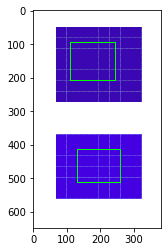

In [31]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('C:\\Users\\ADMINS\\Desktop\\hsvVsBgr.PNG')
# print(image.shape)
red1 = image[97:244,110:244,:]
# image[29:138,54:155,:] = [0,0,0] 
red2 = image[415:513,131:159,:]
hsv_1 = cv2.cvtColor(red1, cv2.COLOR_BGR2HSV)
hsv_2 = cv2.cvtColor(red2, cv2.COLOR_BGR2HSV)
print(hsv_1[0,0,:])
print(hsv_2[0,0,:])

cv2.rectangle(image,(110,97),(244,208),color, 2)
cv2.rectangle(image,(131,415),(259,513),color, 2)

plt.imshow(image)
                   

In [2]:
import os 
import cv2
import numpy as np
import time

count = 0
used = []
path = "C:/Users/ADMINS/Desktop/test_real_time/"
while True:
    file = [f for f in os.listdir(path)]
    if cv2.waitKey(25) & 0xFF == ord('q'):
        break
    if len(file) > count:
        for f in file: 
            print(f)
            if f not in used:
                image = cv2.imread(path + f)
                print(image.shape)
                used.append(f)
                count = len(file)
    else:
        time.sleep(5)
        
cv2.destroyAllWindows()

1.jpg
(435, 580, 3)
high_school.jpg
(477, 720, 3)
some.jpg
(960, 792, 3)
1.jpg
high_school.jpg
some.jpg
world_map.jpg
(1479, 2000, 3)


KeyboardInterrupt: 